# Exploración de Datos

Resumen:
En este notebook se realizará la exploración de datos para encontrar posibles patrones desde donde podeamos crear una solución

1. Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2. Lectura de datos

In [3]:
df = pd.read_excel('../data/ConsumptionPrediction_Dataset_v1.xlsx', sheet_name='Sheet1')
df.head()

,Flight_ID,Origin,Date,Flight_Type,Service_Type,Passenger_Count,Product_ID,Product_Name,Standard_Specification_Qty,Quantity_Returned,Quantity_Consumed,Unit_Cost,Crew_Feedback
0,AM109,DOH,2025-09-26,medium-haul,Retail,272,BRD001,Bread Roll Pack,62,7,55,0.35,NaN
1,AM109,DOH,2025-09-26,medium-haul,Retail,272,CRK075,Butter Cookies 75g,74,14,60,0.75,NaN
2,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK023,Sparkling Water 330ml,125,30,95,0.45,NaN
3,AM109,DOH,2025-09-26,medium-haul,Retail,272,DRK024,Still Water 500ml,110,19,91,0.50,NaN
4,LX110,DOH,2025-09-26,medium-haul,Pick & Pack,272,BRD001,Bread Roll Pack,177,58,119,0.35,NaN


## Visualización de los datos

### 1. Comparación de cantidades consumidas y retornadas por tipo de servicio

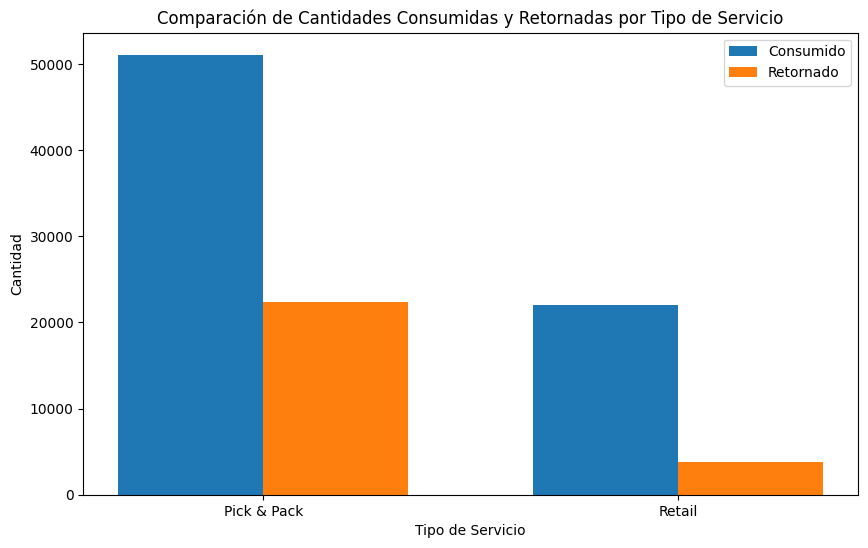

El % de productos retornados en el servicio Pick&Pack es mayor que en el servicio Retail.


In [14]:
# Gráfico que muestre el consumo entre categoria retail y Pick&Pack
df_category = df.groupby(['Service_Type']).sum().reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df_category['Service_Type']))

plt.bar(index - bar_width/2, df_category['Quantity_Consumed'], bar_width, label='Consumido')
plt.bar(index + bar_width/2, df_category['Quantity_Returned'], bar_width, label='Retornado')

plt.xlabel('Tipo de Servicio')
plt.ylabel('Cantidad')
plt.title('Comparación de Cantidades Consumidas y Retornadas por Tipo de Servicio')
plt.xticks(index, df_category['Service_Type'])
plt.legend()
plt.show()

print("El % de productos retornados en el servicio Pick&Pack es mayor que en el servicio Retail.")

Este gráfico nos muestra cómo el método Pick & Pack tiene un mayor consumo de productos, pero al mismo tiempo también un mayor nivel de retorno tanto numéricamente como porcentualmente, por lo que debemos concentrarnos en bajar lo más posible el retorno de pick and pack

### 2. Varianza de Pick and Pack

C:\Users\Pansocrates03\AppData\Local\Temp\ipykernel_26368\2269401397.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[


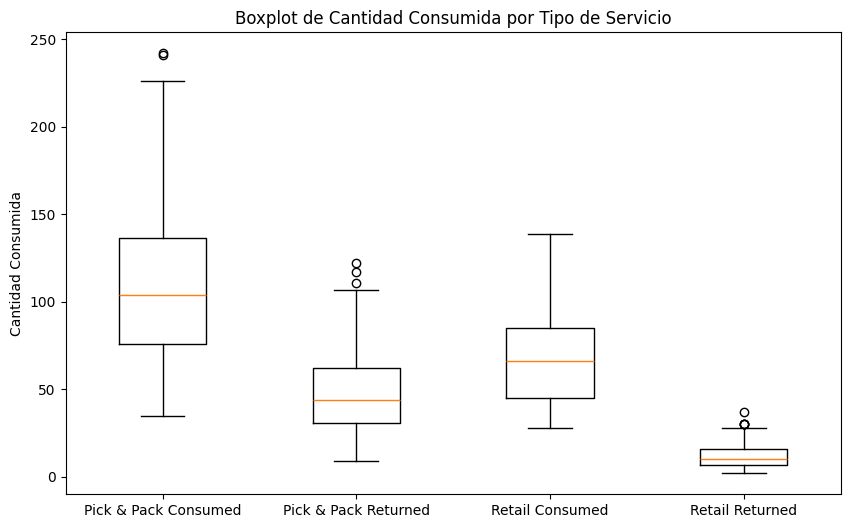

La varianza de la cantidad consumida en el servicio Pick&Pack es: 1859.0108812528147
La varianza de la cantidad consumida en el servicio Retail es: 626.8277872744538


In [40]:
# Varianza de tipo de servicio Pick&Pack

# Boxplot de Pick&Pack con respecto a la cantidad consumida y mostrar ambos boxplots
plt.figure(figsize=(10, 6))
data_to_plot = [
    df[df['Service_Type'] == 'Pick & Pack']['Quantity_Consumed'],
    df[df['Service_Type'] == 'Pick & Pack']['Quantity_Returned'],
    df[df['Service_Type'] == 'Retail']['Quantity_Consumed'],
    df[df['Service_Type'] == 'Retail']['Quantity_Returned']
]
plt.boxplot(data_to_plot, labels=[
    'Pick & Pack Consumed', 'Pick & Pack Returned', 'Retail Consumed', 'Retail Returned'
    ])
plt.ylabel('Cantidad Consumida')
plt.title('Boxplot de Cantidad Consumida por Tipo de Servicio')
plt.show()

# Obtener el subset de datos para el servicio Pick&Pack
df_pickpack = df[df['Service_Type'] == 'Pick & Pack']
variance_pickpack = df_pickpack['Quantity_Consumed'].var()
print(f'La varianza de la cantidad consumida en el servicio Pick&Pack es: {variance_pickpack}')
variance_retail = df[df['Service_Type'] == 'Retail']['Quantity_Consumed'].var()
print(f'La varianza de la cantidad consumida en el servicio Retail es: {variance_retail}')

